In [1]:
!pip install transformers pandas matplotlib

In [2]:
from transformers import pipeline
import pandas as pd
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

# 1) Load your two fine-tuned summarization pipelines
bart = pipeline("summarization", model="hmankar01/bart-finetuned-reddit-tifu")
pegasus = pipeline("summarization", model="hmankar01/pegasus-reddit")

# 2) Define the paragraphs you want to summarize
paragraphs = [
    """This happened yesterday but I guess the FU technically spans approximately 5 years.I finished my master's degree in late 2019, or at least I thought I did. After a grueling
year of working part-time and writing my dissertation, at long last I got it finished, presented it in November, got my grade immediately after, my dad was even there to watch the
presentation, good times. Because the holidays were right around the corner I didn't have my diploma until February 2020 and, well... I think we all know what happened to the world
 right after.
When I got home after getting the diploma, I scanned it so I would have a digital copy to send to employers and stuff, put the physical version safely away, and proceeded to not
    really think about it anymore. That's where the FU began. To be honest I didn't even really look at it super carefully, writing my dissertation was so incredibly exhausting and
    draining that I was just glad it was over and wanted to focus on my work.
Years went by. I got through the pandemic, my career as a freelancer started gaining momentum, I fell in love, even moved to a different country. Recently I changed my name and
    emailed my university to ask about getting new copies of my diplomas with the new name. Somewhere in one of the replies from the university they asked "are you perhaps
    referring to your specialization diploma? We have no record of you finishing a dissertation, only all the other classes in the master's degree."
My heart dropped.I looked at the digital copy I've kept for years, even dug up the physical version just to be sure, and lo and behold... While the diploma does mention the
master's degree by its name very early on, on the middle of the second page it does specify that it's a "Specialization". I have to admit I panicked. I scoured my old emails for
    something, anything, that could help me prove that I didn't imagine the whole thing and wrote back explaining that I did finish my dissertation and asking what can be done to
     try to understand what actually happened here. They haven't replied yet, hopefully they will in the next few days. I know the professor who was my advisor can vouch for the
      fact that the presentation did indeed happen but I'm terrified that, because it's been so long, nothing can really be done about it anymore. I guess time will tell.
I honestly feel heartbroken. Thinking that all that hard work could go to waste makes me want to cry. More than anything I'm furious at myself for not paying more attention and
 catching this sooner, I feel like such an idiot!
Wish me luck figuring this out."""
]



config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/3.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.60M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

Device set to use cpu


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


   len_BART  len_Pegasus  similarity
0        16           13    0.549223


,BART,Pegasus
0,"didn't scan my diploma properly, ended up with...","thought my master's degree was a ""specializati..."


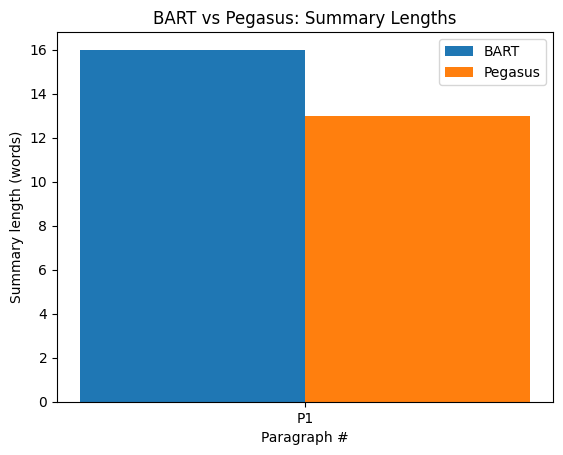

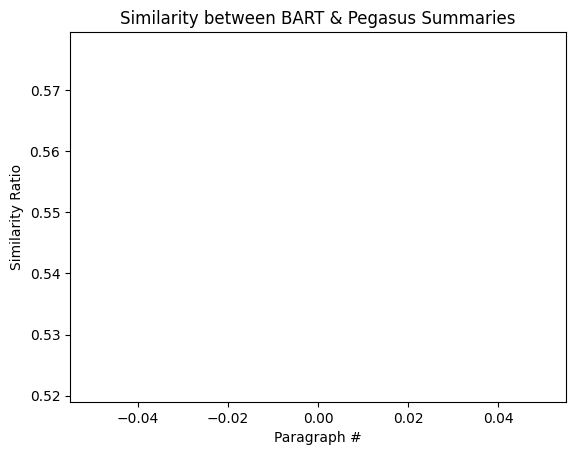

In [3]:
# 3) Generate summaries, measure lengths and compute similarity
records = []
for para in paragraphs:
    s1 = bart(para, truncation=True)[0]['summary_text']
    s2 = pegasus(para, truncation=True)[0]['summary_text']
    l1, l2 = len(s1.split()), len(s2.split())
    sim = SequenceMatcher(None, s1, s2).ratio()
    records.append({
        "input":       para,
        "BART":        s1,
        "Pegasus":     s2,
        "len_BART":    l1,
        "len_Pegasus": l2,
        "similarity":  sim
    })

df = pd.DataFrame(records)

# 4) Show results
print(df[["len_BART","len_Pegasus","similarity"]])
display(df[["BART","Pegasus"]])

fig, ax = plt.subplots()
x = list(range(len(df)))
w = 0.35
ax.bar([i-w/2 for i in x], df.len_BART, w, label="BART")
ax.bar([i+w/2 for i in x], df.len_Pegasus, w, label="Pegasus")
ax.set_xticks(x)
ax.set_xticklabels([f"P{i+1}" for i in x])
ax.set_xlabel("Paragraph #")
ax.set_ylabel("Summary length (words)")
ax.legend()
ax.set_title("BART vs Pegasus: Summary Lengths")
plt.show()

# 6) similarity ratio
plt.figure()
plt.plot(x, df.similarity)
plt.xlabel("Paragraph #")
plt.ylabel("Similarity Ratio")
plt.title("Similarity between BART & Pegasus Summaries")
plt.show()


In [4]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=01834b8c7400fe4a11e6bdcab9f32c3b7b489adcb81a0ad4fc5f4a096b8c789b
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


   ROUGE1_BART  ROUGE1_Pegasus  ROUGE2_BART  ROUGE2_Pegasus  ROUGEL_BART  \
0       0.6875          0.6875     0.466667        0.466667       0.4375   

   ROUGEL_Pegasus  
0          0.4375  


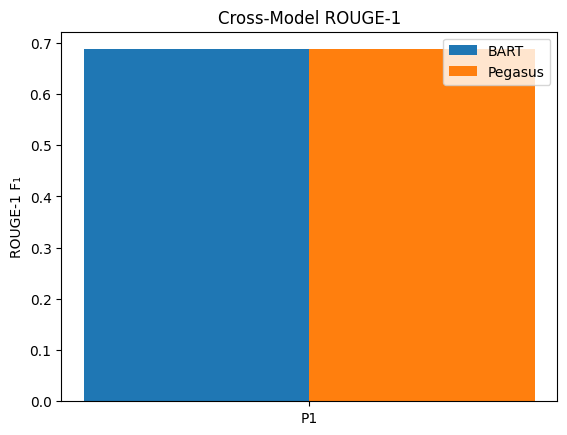

In [5]:
# 7) Cross-model ROUGE (no human refs)
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'], use_stemmer=True)

# Prepare new columns
for col in ['ROUGE1_BART','ROUGE2_BART','ROUGEL_BART',
            'ROUGE1_Pegasus','ROUGE2_Pegasus','ROUGEL_Pegasus']:
    df[col] = 0.0

# Score Pegasus summaries against BART as “reference”
for i, row in df.iterrows():
    scores = scorer.score(row['BART'], row['Pegasus'])
    df.at[i, 'ROUGE1_Pegasus'] = scores['rouge1'].fmeasure
    df.at[i, 'ROUGE2_Pegasus'] = scores['rouge2'].fmeasure
    df.at[i, 'ROUGEL_Pegasus'] = scores['rougeL'].fmeasure

# Score BART summaries against Pegasus as “reference”
for i, row in df.iterrows():
    scores = scorer.score(row['Pegasus'], row['BART'])
    df.at[i, 'ROUGE1_BART'] = scores['rouge1'].fmeasure
    df.at[i, 'ROUGE2_BART'] = scores['rouge2'].fmeasure
    df.at[i, 'ROUGEL_BART'] = scores['rougeL'].fmeasure

# 8) Inspect the ROUGE columns
print(df[[
    'ROUGE1_BART','ROUGE1_Pegasus',
    'ROUGE2_BART','ROUGE2_Pegasus',
    'ROUGEL_BART','ROUGEL_Pegasus'
]])

# 9) Plot ROUGE-1 comparison
fig, ax = plt.subplots()
x = list(range(len(df)))
ax.bar([i-0.2 for i in x], df.ROUGE1_BART,    0.4, label='BART')
ax.bar([i+0.2 for i in x], df.ROUGE1_Pegasus, 0.4, label='Pegasus')
ax.set_xticks(x)
ax.set_xticklabels([f'P{i+1}' for i in x])
ax.set_ylabel('ROUGE-1 F₁')
ax.set_title('Cross-Model ROUGE-1')
ax.legend()
plt.show()
